<a href="https://colab.research.google.com/github/icaro2222/Analise_de_Dados/blob/main/Trecho_de_c%C3%B3digo%2C_para_cria%C3%A7%C3%A3o_e_teste_da_plataforma_web.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
# Realizando a importação das bibliotecas.

# Pandas para leitura e manipulação dos dados.
import pandas as pd

# "create_engine" para Conexão com o banco de dados.
import sqlalchemy
from sqlalchemy import create_engine

# Biblioteca para criar gráficos onlines interativos em formato "html".
import plotly.express as px

# Biblioteca para criar gráficos onlines interativos em formato "html".
import plotly.graph_objects as go 

# Biblioteca para criar gráficos e tabelas.
import matplotlib.pyplot as plt
import matplotlib as mpl

# "Numpy" para a manipulação dos dados e cálculos matemáticos e estatísticos.
import numpy as np

In [46]:

# Conexão com "Postgresql" do "Heroku", também utilizada na plataforma web.

# Variáveis a serem utilizadas.
tipo_db = "postgresql"
host="ec2-54-87-179-4.compute-1.amazonaws.com"
user="ccgapwggqseseb"
passwod="bf9adeb9b12252a5a9377ede93702f53f404d6f23a9db8aeb77f3d2704a820f4"
database="da0rf6a9o8h8v3"
porta= 5432

# Realizando a conexão com o banco de dados, utilizando o método create_engine e as variáveis acima.
conexao = str(tipo_db)+"://"+str(user)+":"+str(passwod)+"@"+str(host)+":" + str(porta)+"/"+str(database)

# Conectando com o Banco de Dados
engine = create_engine(conexao, pool_pre_ping=True)

print("Conexãop com o banco bem sucedida!")
    

Conexãop com o banco bem sucedida!


In [47]:
# Criando "query", para buscar no banco de dados, apenas as variáveis necessárias, com possibilidade de colocar filtros.
query = 'SELECT "Q001", "NU_NOTA_MT" FROM "enem"'

# Utilizando a biblioteca Pandas para realizar a busca no banco de  dados, 
# por meio da conexão estabelecida através do método "create_engine".
df = pd.read_sql(query, engine)

In [48]:
# Transformando em um "dataframe", os dados que foram pegos do banco de dados.
Microdado_Enem = pd.DataFrame(df)

# Visualizando informações do "Dataframe" acima.
Microdado_Enem.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Q001        201 non-null    object 
 1   NU_NOTA_MT  201 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB


In [49]:
# Realizando a "filtragem" de dados, para o que se é desejado.
DataFrame = Microdado_Enem.filter(items = ['Q001', 'NU_NOTA_MT'])

# Realizando a Ordenação pela coluna "Q001".
DataFrame = DataFrame.sort_values(by=['Q001'])

# Criando agrupamento entre a coluna "Q001" e a  coluna "NU_NOTA_MT".
DataFrame = DataFrame.groupby('Q001')['NU_NOTA_MT']

In [50]:
# Utilizando do método "describe()", que permite a parte do agrupamento de colunas,
#  criar uma tabela com os valores de (count,	mean,	std,	min,	25%,	50%,	75% e	max). 
DataFrame = DataFrame.describe()

In [51]:
# Imprimindo o retorno do método "describe()".
DataFrame

,count,mean,std,min,25%,50%,75%,max
Q001,,,,,,,,
A,10.0,250.800000,216.609121,0.0,0.00,399.5,406.75,450.0
B,47.0,388.761702,176.763841,0.0,390.00,433.0,463.00,683.0
C,25.0,364.760000,218.090058,0.0,392.00,429.0,500.00,610.0
D,32.0,420.825000,158.220862,0.0,379.50,432.8,513.25,664.0
E,47.0,411.995745,221.745694,0.0,387.50,459.0,567.80,751.0
F,8.0,540.875000,244.943980,0.0,498.75,569.0,702.25,801.0
G,3.0,360.333333,326.052654,0.0,223.00,446.0,540.50,635.0
H,29.0,361.286207,235.692945,0.0,0.00,456.0,548.00,608.0


In [52]:
# Utilizando o método "px", para criar um gráfico em linhas, sendo também possível gerar outros tipos de gráficos.
px.line(DataFrame)

In [53]:
# Utilizando o método "px", para criar um gráfico em tabelas unidas.
px.bar(DataFrame)

In [54]:
# Testando gráficos do método "px".
px.scatter(DataFrame)

In [55]:
# Definindo cores que seram utilizadas na  tabela
rowEvenColor = 'lightgrey'
rowOddColor = 'white'


# Criando a tabela, utilizando a biblioteca "go".
fig = go.Figure(data=[go.Table(
        header=dict(
            values=['Respostas', 'medias', 'máximo', 'quant alunos', '25%', '50%', '75%'],
            fill_color='royalblue',
            height=40,
            line_color='darkslategray',
            align=['left','center'],
            font=dict(color='white', size=12)
        ),
        cells=dict(
            values=[DataFrame.index,
            DataFrame['mean'], DataFrame['max'], DataFrame['count'], DataFrame['25%'], DataFrame['50%'], DataFrame['75%']],
            line_color='darkslategray',
            # 2-D list of colors for alternating rows
            fill_color = [[rowOddColor,rowEvenColor,rowOddColor, rowEvenColor,rowOddColor]*5],
            align = ['left', 'center'],
            font = dict(color = 'darkslategray', size = 11)
            ))
        ])


In [56]:
fig

Text(0.5, 0, 'Questão Socioeconômica')

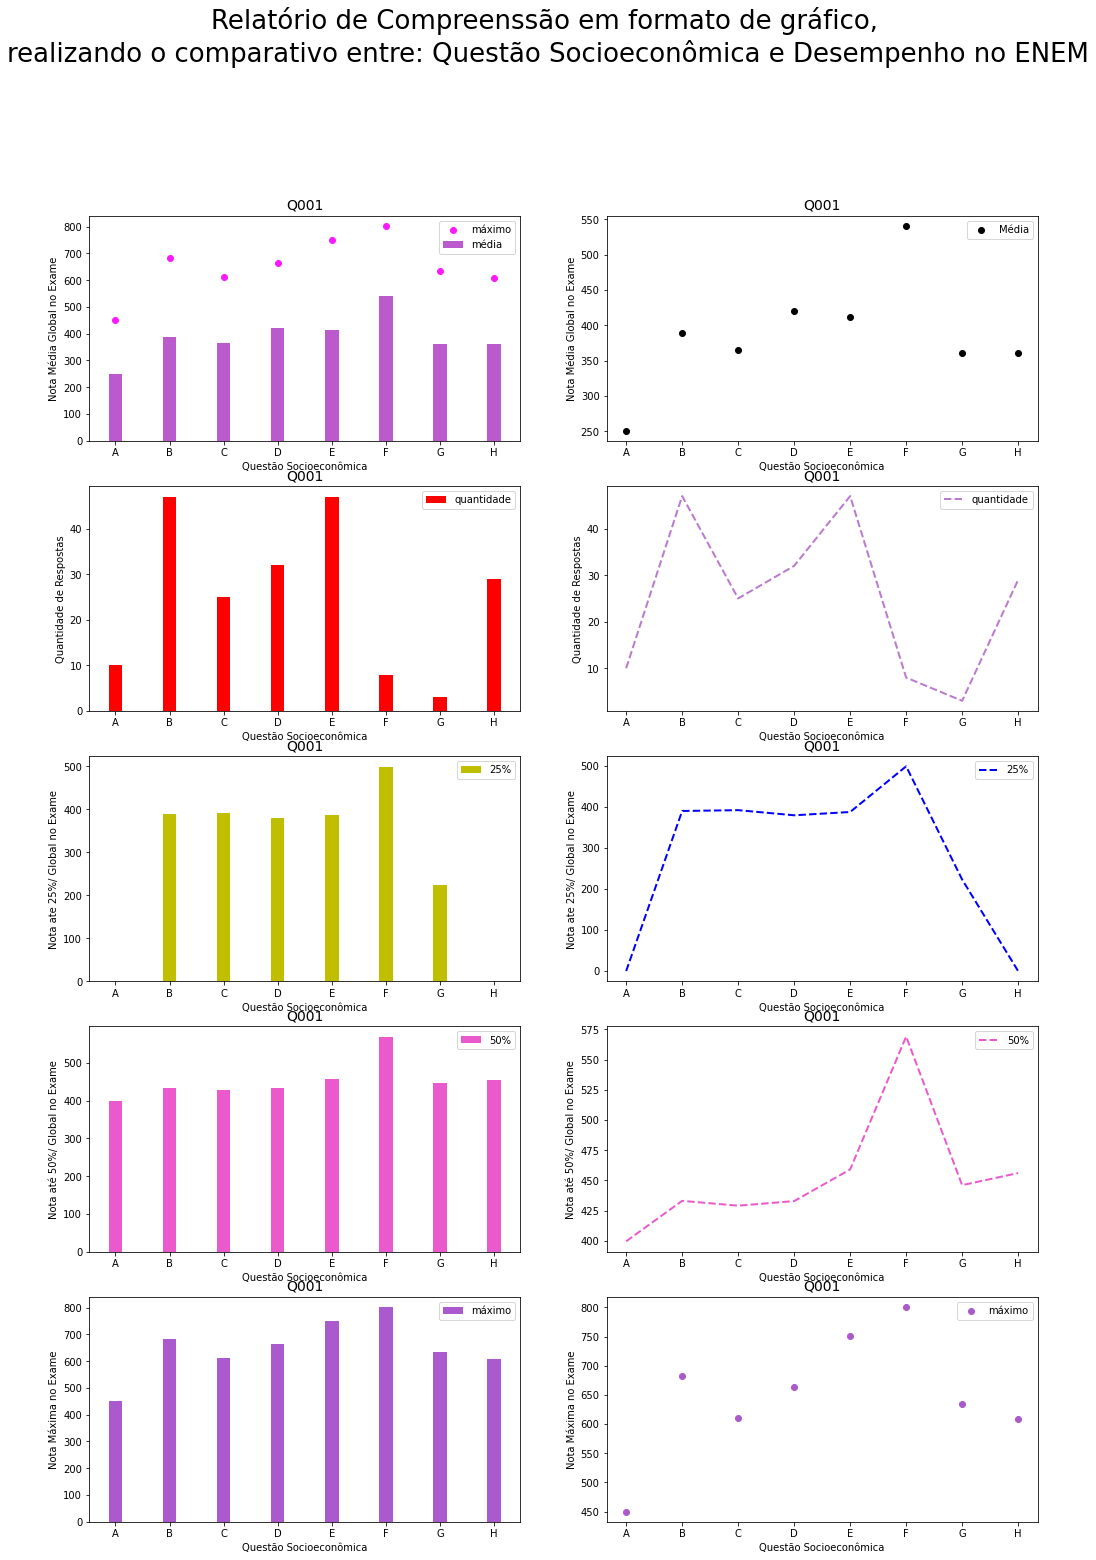

In [57]:
# Utilizando variáveis para não ter que ficar trocando o nome em vários locais.
Q = 'Q001'
prova = 'NU_NOTA_MT'

# Passando os valores do "Dataframe" para outra variável, com proposito de não modificar o valor dela por acidente.
dados = DataFrame
dados_index = Microdado_Enem['NU_NOTA_MT']

width = 0.25         # A largura das barras

# Criando espécie de "index", com o "Numpy", para ser utilizado ao gerar os gráficos
r1 = np.arange(len(dados_index))
r2 = [x + width for x in r1]

# Utilizando o "Matplotlib" para a "estilização" dos gráficos.
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.linestyle'] = '--'

# Criando uma "figura", com o tamanho já setado(17, 29).
figura = plt.figure(figsize=(17, 29))

# Declarando o "título" da figura.
figura.suptitle('Relatório de Compreenssão em formato de gráfico, \n'+
'realizando o comparativo entre: Questão Socioeconômica e Desempenho no ENEM', size=26)

# Nestes trechos similares que estão se repetindo, acontece a adição de um novo gráfico à figura criada anteriormente.

# Definindo a "posição" da figura.
figura.add_subplot(6,2,1)

# Criando o "gráfico" na posição que foi definida.
bar_label_mean = plt.bar(dados.index, dados['mean'], color='#BA5ACD', width=width, label="média")
plt.scatter(dados.index, dados['max'], color='#FA1AFD', label="máximo")

# Adicionando "legenda" ao "gráfico" que foi criado.
plt.legend()

# Colocando "título" na figura, e os "rótulos" de x e y.
plt.title(Q, size=14, y=1)
plt.ylabel('Nota Média Global no Exame')
plt.xlabel('Questão Socioeconômica')

figura.add_subplot(6,2,2)
plt.scatter(dados.index, dados['mean'],  c='k', label='Média')
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota Média Global no Exame')
plt.xlabel('Questão Socioeconômica')

figura.add_subplot(6,2,3)
plt.bar(dados.index, dados['count'], color='r', width=width, label="quantidade")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Quantidade de Respostas')
plt.xlabel('Questão Socioeconômica')

figura.add_subplot(6,2,4)
plt.plot(dados.index, dados['count'], color='#BA7ACD', label="quantidade")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Quantidade de Respostas')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6,2,5)
plt.bar(dados.index, dados['25%'], color='y', width=width, label="25%")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota ate 25%/ Global no Exame')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6,2,6)
plt.plot(dados.index, dados['25%'], color='b', label="25%")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota ate 25%/ Global no Exame')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6,2,7)
plt.bar(dados.index, dados['50%'], color='#EA5ACD', width=width, label="50%")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota até 50%/ Global no Exame')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6,2,8)
plt.plot(dados.index, dados['50%'], color='#EA5ACD', label="50%")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota até 50%/ Global no Exame')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6,2,9)
plt.bar(dados.index, dados['max'], color='#AA5ACD', width=width, label="máximo")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota Máxima no Exame')
plt.xlabel('Questão Socioeconômica')


figura.add_subplot(6, 2, 10)
plt.scatter(dados.index, dados['max'], color='#AA5ACD',  label="máximo")
plt.legend()

plt.title(Q, size=14)
plt.ylabel('Nota Máxima no Exame')
plt.xlabel('Questão Socioeconômica')